## Final Project Notebook

In [1]:
project_title = "Predicting Oscar-Nominated Film Performance"
notebook_author = "Yasemin Gunal & Alice Wou"

### Imports & Reading in dataset

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:
np.random.seed(42)

In [4]:
movies = pd.read_csv("oscars_df.csv")

### Exploratory Data Analysis & Cleaning

In [5]:
movies.columns

Index(['Unnamed: 0', 'Film', 'Oscar Year', 'Film Studio/Producer(s)', 'Award',
       'Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating',
       'IMDB Votes', 'Movie Info', 'Genres', 'Critic Consensus',
       'Content Rating', 'Directors', 'Authors', 'Actors',
       'Original Release Date', 'Streaming Release Date', 'Production Company',
       'Tomatometer Status', 'Tomatometer Rating', 'Tomatometer Count',
       'Audience Status', 'Audience Rating', 'Audience Count',
       'Tomatometer Top Critics Count', 'Tomatometer Fresh Critics Count',
       'Tomatometer Rotten Critics Count', 'Film ID'],
      dtype='object')

In [6]:
#keeping only necessary columns
movies = movies[['Award','Year of Release', 'Movie Time', 'Movie Genre', 'IMDB Rating', 'IMDB Votes',
               'Tomatometer Rating']]

movies.head()

,Award,Year of Release,Movie Time,Movie Genre,IMDB Rating,IMDB Votes,Tomatometer Rating
0,Winner,1927,144,"Drama,Romance,War",7.5,"12,221",93.0
1,Nominee,1927,110,"Drama,Romance",7.7,"3,439",NaN
2,Nominee,1928,84,"Crime,Drama,Film-Noir",6.7,"1,257",NaN
3,Winner,1929,100,"Drama,Musical,Romance",5.7,"6,890",33.0
4,Nominee,1929,91,"Action,Crime,Romance",5.8,765,NaN


In [7]:
movies.describe()

,Year of Release,Movie Time,IMDB Rating,Tomatometer Rating
count,571.000000,571.000000,571.000000,439.000000
mean,1973.357268,124.894921,7.570403,87.503417
std,29.315738,26.322817,0.559652,11.690622
min,1927.000000,66.000000,5.600000,29.000000
25%,1944.000000,107.000000,7.300000,84.000000
50%,1972.000000,121.000000,7.600000,91.000000
75%,2001.000000,136.500000,7.900000,95.000000
max,2021.000000,238.000000,9.300000,100.000000


Based on the .describe() function, we can see that there are 571 entries for all columns except for the Tomatometer Rating, indicating that this column may contain null values. Additionally, the most recent year of release is 2021, meaning no movies from the current year are in this dataset -- this could allow for interesting tests on the predictive model utilizing titles released in 2022. The standard deviation of IMDB ratings is extremely small, indicating that most ratings through this metric are clustered around the average of ~7.6 / 10. 

In [8]:
movies.shape

(571, 7)

In [9]:
movies.isnull().sum()

Award                   0
Year of Release         0
Movie Time              0
Movie Genre             0
IMDB Rating             0
IMDB Votes              0
Tomatometer Rating    132
dtype: int64

In [10]:
movies['Tomatometer Rating'].fillna(np.mean(movies['Tomatometer Rating']), inplace=True)

In [11]:
movies['IMDB Votes'] = movies['IMDB Votes'].str.replace(",", "").astype(float)
movies['Award'] = movies['Award'].astype(str)
movies['Movie Genre'] = movies['Movie Genre'].astype(str)

In [12]:
movies.dtypes

Award                  object
Year of Release         int64
Movie Time              int64
Movie Genre            object
IMDB Rating           float64
IMDB Votes            float64
Tomatometer Rating    float64
dtype: object

In [13]:
movies["genre_list"] = movies.pop("Movie Genre").str.split(",")
movies_exp = movies.explode("genre_list")

In [14]:
movies_exp.nunique()

Award                   2
Year of Release        95
Movie Time            118
IMDB Rating            35
IMDB Votes            570
Tomatometer Rating     50
genre_list             22
dtype: int64

There are 22 total unique genres now that they have been exploded. 

In [15]:
movies_exp['Award'].value_counts()

Nominee    1192
Winner      235
Name: Award, dtype: int64

Very small percentage of nominees are winners

In [16]:
movies_exp.isnull().sum()

Award                 0
Year of Release       0
Movie Time            0
IMDB Rating           0
IMDB Votes            0
Tomatometer Rating    0
genre_list            0
dtype: int64

In [17]:
movies_exp.groupby(['genre_list'])['Tomatometer Rating'].mean().sort_values(ascending=False).head(5)

genre_list
Animation    96.666667
Mystery      93.179304
Film-Noir    92.808481
Sci-Fi       92.150342
Crime        90.549228
Name: Tomatometer Rating, dtype: float64

In [18]:
movies_exp['Award'] = np.where(movies_exp['Award'] == 'Winner', 1,0)
movies_exp.head()

,Award,Year of Release,Movie Time,IMDB Rating,IMDB Votes,Tomatometer Rating,genre_list
0,1,1927,144,7.5,12221.0,93.000000,Drama
0,1,1927,144,7.5,12221.0,93.000000,Romance
0,1,1927,144,7.5,12221.0,93.000000,War
1,0,1927,110,7.7,3439.0,87.503417,Drama
1,0,1927,110,7.7,3439.0,87.503417,Romance


### Visualizations to supplement quantitative analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Romance'),
  Text(2, 0, 'War'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Film-Noir'),
  Text(5, 0, 'Musical'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Comedy'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Biography'),
  Text(13, 0, 'Family'),
  Text(14, 0, 'Adventure'),
  Text(15, 0, 'Sport'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'Fantasy'),
  Text(18, 0, 'Sci-Fi'),
  Text(19, 0, 'Horror'),
  Text(20, 0, 'Animation'),
  Text(21, 0, 'Comdey')])

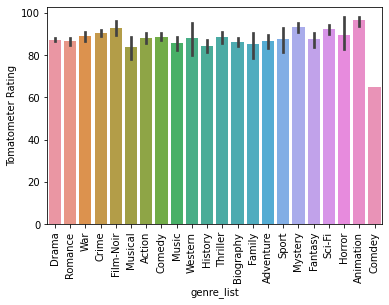

In [19]:
sns.barplot(x='genre_list', y='Tomatometer Rating', data=movies_exp)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Romance'),
  Text(2, 0, 'War'),
  Text(3, 0, 'Crime'),
  Text(4, 0, 'Film-Noir'),
  Text(5, 0, 'Musical'),
  Text(6, 0, 'Action'),
  Text(7, 0, 'Comedy'),
  Text(8, 0, 'Music'),
  Text(9, 0, 'Western'),
  Text(10, 0, 'History'),
  Text(11, 0, 'Thriller'),
  Text(12, 0, 'Biography'),
  Text(13, 0, 'Family'),
  Text(14, 0, 'Adventure'),
  Text(15, 0, 'Sport'),
  Text(16, 0, 'Mystery'),
  Text(17, 0, 'Fantasy'),
  Text(18, 0, 'Sci-Fi'),
  Text(19, 0, 'Horror'),
  Text(20, 0, 'Animation'),
  Text(21, 0, 'Comdey')])

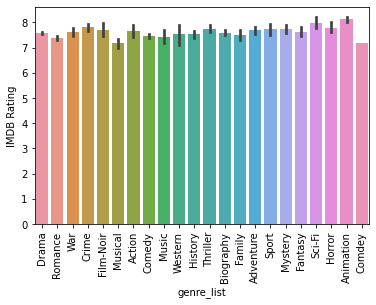

In [20]:
sns.barplot(x='genre_list', y='IMDB Rating', data=movies_exp)
plt.xticks(rotation=90)

In [21]:
movies_exp.groupby(['genre_list'])['IMDB Rating'].mean().sort_values(ascending=False).head(5)

genre_list
Animation    8.133333
Sci-Fi       7.980000
Crime        7.804167
Horror       7.766667
Thriller     7.750000
Name: IMDB Rating, dtype: float64

Text(0.5, 1.0, 'Movie Time vs. IMDB Rating')

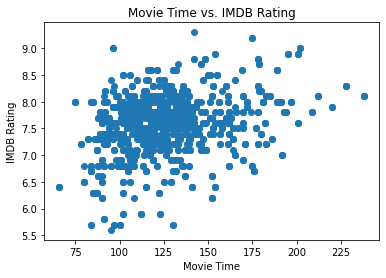

In [22]:

plt.scatter(movies_exp['Movie Time'], movies_exp['IMDB Rating'])
plt.ylabel('IMDB Rating')
plt.xlabel('Movie Time')
plt.title('Movie Time vs. IMDB Rating')

Text(0.5, 1.0, 'IMDB Votes vs. IMDB Rating')

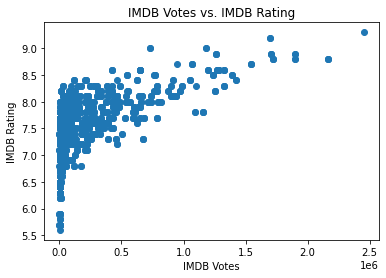

In [23]:
plt.scatter(movies_exp['IMDB Votes'], movies_exp['IMDB Rating'])
plt.ylabel('IMDB Rating')
plt.xlabel('IMDB Votes')
plt.title('IMDB Votes vs. IMDB Rating')

Text(0.5, 1.0, 'Tomatometer Rating vs. IMDB Rating')

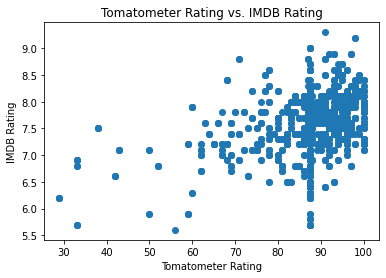

In [24]:
plt.scatter(movies_exp['Tomatometer Rating'], movies_exp['IMDB Rating'])
plt.ylabel('IMDB Rating')
plt.xlabel('Tomatometer Rating')
plt.title('Tomatometer Rating vs. IMDB Rating')

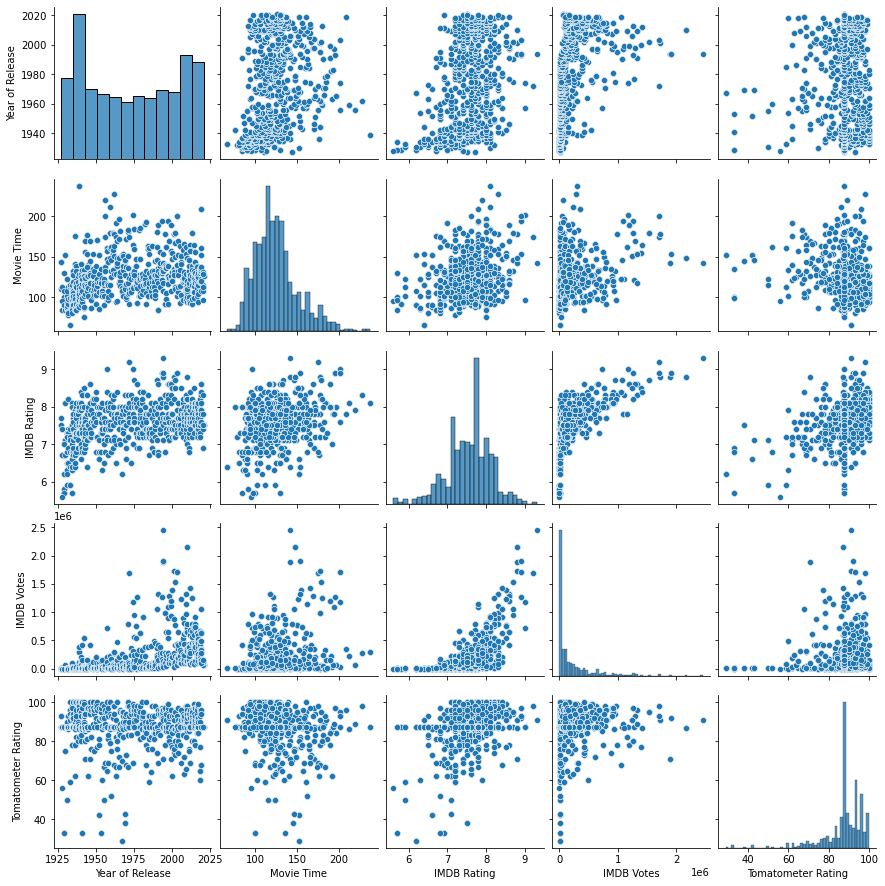

In [25]:
sns.pairplot(movies_exp, vars=['Year of Release', 'Movie Time', 'IMDB Rating', 'IMDB Votes', 'Tomatometer Rating'])

In [26]:
corrs = pd.DataFrame((movies_exp.corr()).unstack().sort_values(ascending=False, key=abs))
corrs = corrs[corrs[0] != 1].drop_duplicates().reset_index()

corrs = corrs.rename(columns={'level_0': 'Var. 1', 'level_1': 'Var. 2', '0': 'Correlation'})
corrs.head()

,Var. 1,Var. 2,0
0,IMDB Votes,IMDB Rating,0.601700
1,Year of Release,IMDB Votes,0.514116
2,Tomatometer Rating,IMDB Rating,0.370793
3,Year of Release,IMDB Rating,0.337079
4,Movie Time,IMDB Rating,0.292193


<AxesSubplot:>

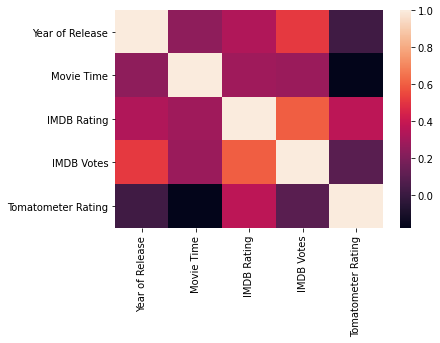

In [27]:
sns.heatmap(movies_exp[['Year of Release', 'Movie Time', 'IMDB Rating', 'IMDB Votes', 'Tomatometer Rating']].corr())



[Text(0.5, 1.0, 'IMDB Rating vs. Award')]

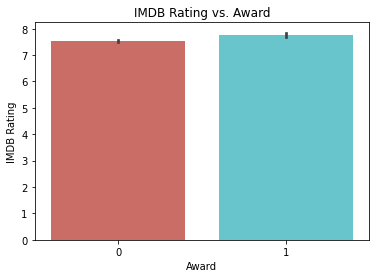

In [28]:
sns.barplot(data=movies_exp, x='Award', y='IMDB Rating', palette = 'hls').set(title='IMDB Rating vs. Award')

[Text(0.5, 1.0, 'Tomatometer Rating vs. Award')]

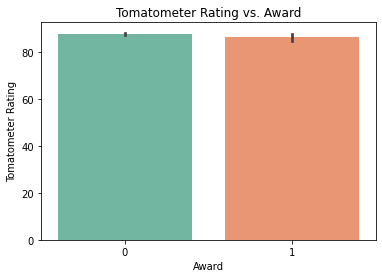

In [29]:
sns.barplot(data=movies_exp, x='Award', y='Tomatometer Rating', palette = 'Set2').set(title='Tomatometer Rating vs. Award')

### Predictive Model Creation & Accuracy Testing

In [30]:
from sklearn.model_selection import train_test_split

X = movies_exp.drop('Award', axis=1)
y = movies_exp['Award']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(X_train.select_dtypes(include=[np.number]))
cat_attribs = list(X_train.select_dtypes(exclude=[np.number]))

display(num_attribs, cat_attribs)

['Year of Release',
 'Movie Time',
 'IMDB Rating',
 'IMDB Votes',
 'Tomatometer Rating']

['genre_list']

In [32]:
full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)])

X_train_prepared = full_pipeline.fit_transform(X_train)

In [33]:
from sklearn.ensemble import RandomForestClassifier
forestmodel = RandomForestClassifier(n_estimators=50, random_state=42, criterion="entropy", max_depth=None,
                                     min_samples_split=2)

forestmodel.fit(X_train_prepared, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=42)

In [34]:
X_test_prepared = full_pipeline.transform(X_test)

In [35]:
y_forest_preds = forestmodel.predict(X_test_prepared)
y_forest_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
forest_acc = accuracy_score(y_test, y_forest_preds)

In [38]:
print("Forest Accuracy: %.2f%%" % (forest_acc * 100.0))

Forest Accuracy: 93.71%


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print("FOREST CONFUSION MATRIX: ", confusion_matrix(y_test, y_forest_preds))


FOREST CONFUSION MATRIX:  [[243   2]
 [ 16  25]]


In [40]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear',multi_class="auto")
log_model.fit(X_train_prepared, y_train)
y_log_preds = log_model.predict(X_test_prepared)
y_log_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [41]:
log_acc = accuracy_score(y_test, y_log_preds)
print("LogReg Accuracy: %.2f%%" % (log_acc * 100.0))

LogReg Accuracy: 84.97%


In [42]:
print("LOGREG CONFUSION MATRIX: ", confusion_matrix(y_test, y_log_preds))

LOGREG CONFUSION MATRIX:  [[240   5]
 [ 38   3]]


## my own test: 

In [43]:
nope = {'Year of Release':2022, 'Movie Time': 130, 'IMDB Rating':6.9 , 'IMDB Votes': 159229, 'Tomatometer Rating': 82.0, 'genre_list': 'Horror' }
ticket_paradise = {'Year of Release':2022, 'Movie Time':104 , 'IMDB Rating': 6.2, 'IMDB Votes':24288 , 'Tomatometer Rating': 57.0, 'genre_list':'Romance' }
top_gun = {'Year of Release':2022, 'Movie Time': 131, 'IMDB Rating': 8.4, 'IMDB Votes': 430464, 'Tomatometer Rating':96.0 , 'genre_list':'Adventure' }
banshees = {'Year of Release':2022, 'Movie Time': 114, 'IMDB Rating': 8.2, 'IMDB Votes': 14048, 'Tomatometer Rating':98.0 , 'genre_list':'Drama' }


test_data = [nope, ticket_paradise, banshees, top_gun]
movie_test_matrix = pd.DataFrame(data=test_data)
movie_test_matrix



,Year of Release,Movie Time,IMDB Rating,IMDB Votes,Tomatometer Rating,genre_list
0,2022,130,6.9,159229,82.0,Horror
1,2022,104,6.2,24288,57.0,Romance
2,2022,114,8.2,14048,98.0,Drama
3,2022,131,8.4,430464,96.0,Adventure


In [44]:
movie_test_prep = full_pipeline.transform(movie_test_matrix)
forest_preds_for_test = forestmodel.predict(movie_test_prep)
forest_preds_for_test

array([0, 0, 0, 0])

(Out of curiosity) Tested to see if any of the top movies released recently are more likely to win an Oscar, however it looks like all of them were predicted as 'nominees' rather than 'winners'. 

##### End of Notebook